In [1]:
import time 

from IPython.core.display import display
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
sns.set(font='Osaka')
import pandas as pd

t0 = time.time()
data_dir = '../data/'
file = 'df_sales.csv'
df_sales = pd.read_csv(data_dir + file)
print('Load in ', time.time() - t0)

Load in  0.8688609600067139


/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_sales.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
530103,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [13]:
df_per_item = \
pd.DataFrame(df_sales.groupby('StockCode')['Quantity'].sum())
print(df_per_item.shape)
display(df_per_item.head())

(3922, 1)


,Quantity
StockCode,
10002,860
10080,303
10120,193
10123C,5
10124A,16


In [16]:
df_per_item['#ofTransaction'] = \
pd.DataFrame(df_sales.groupby(['StockCode'])['InvoiceNo'].nunique())
display(df_per_item.head())


# TODO: 商品ごとの 1トランザクションあたりの平均数量が分かるとどういう有意義なことが言えるのか？

,Quantity,#ofTransaction
StockCode,,
10002,860,71
10080,303,22
10120,193,29
10123C,5,3
10124A,16,5


In [17]:
# UnitPrice を複数持つ商品はあるのか？
pd.DataFrame(df_sales.groupby('StockCode')['UnitPrice'].nunique())

,UnitPrice
StockCode,
10002,3
10080,2
10120,1
10123C,1
10124A,1
10124G,1
10125,6
10133,7
10135,7


In [18]:
stock_code = '10002'
df_sales[df_sales['StockCode'] == stock_code]['UnitPrice'].unique()

array([ 0.85,  1.66,  1.63])

In [19]:
df_sales.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Sales          float64
dtype: object

In [23]:
df_unitprice_quantity = \
pd.DataFrame(df_sales.groupby(['StockCode', 'UnitPrice'])['Quantity'].sum()).reset_index()
display(df_unitprice_quantity.head())

,StockCode,UnitPrice,Quantity
0,10002,0.85,824
1,10002,1.63,9
2,10002,1.66,27
3,10080,0.39,301
4,10080,0.85,2


In [25]:
df_unitprice_quantity.describe()

,UnitPrice,Quantity
count,15414.000000,15414.000000
mean,24.021092,362.551966
std,204.531599,1403.840777
min,0.001000,1.000000
25%,1.280000,7.000000
50%,2.950000,38.000000
75%,5.910000,212.000000
max,13541.330000,80995.000000


In [30]:
# CustomerID = NaN であるレコードは除外すべきか？
# 除外しなくてもよさそう。
# 'NaN' で埋めておく。

# 以下の国に CustomerID = NaN の顧客がいる。
df_sales[df_sales['CustomerID'].isnull()]['Country'].unique()

array(['United Kingdom', 'EIRE', 'Bahrain', 'Israel', 'Hong Kong',
       'Unspecified', 'France', 'Switzerland', 'Portugal'], dtype=object)

In [32]:
# CustomerID = NaN を補完
df_sales['CustomerID'] = df_sales['CustomerID'].fillna('NaN')

In [33]:
# CustomerID = NaN が補完されたことを確認
df_sales.sort_values('UnitPrice', ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
14715,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
292815,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06
169097,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75
290589,562955,DOT,DOTCOM POSTAGE,1,2011-08-11 10:14:00,4505.17,NaN,United Kingdom,4505.17
261652,560373,M,Manual,1,2011-07-18 12:30:00,4287.63,NaN,United Kingdom,4287.63


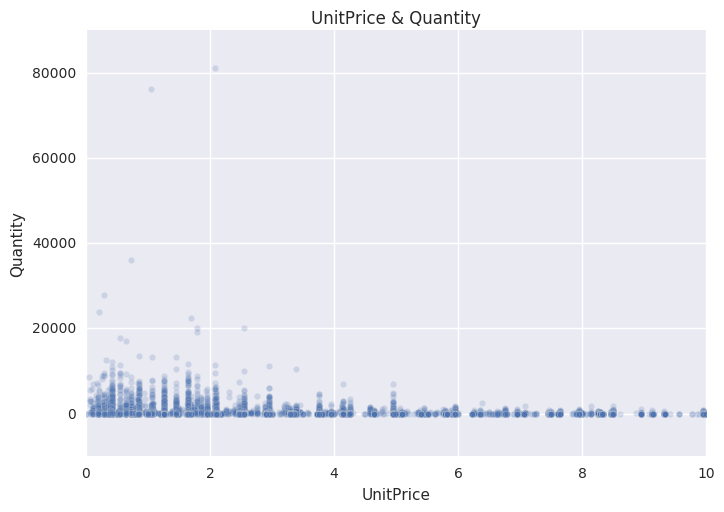

In [36]:
# UnitPrice と Quantity の関係
# UnitPrice が低い商品ほど多く購入されている気がする。
x = 'UnitPrice'
y = 'Quantity'
df_unitprice_quantity.plot(kind='scatter', x=x, y=y, alpha=0.2)
plt.xlim(0, 10)
plt.title('UnitPrice & Quantity')
plt.show()

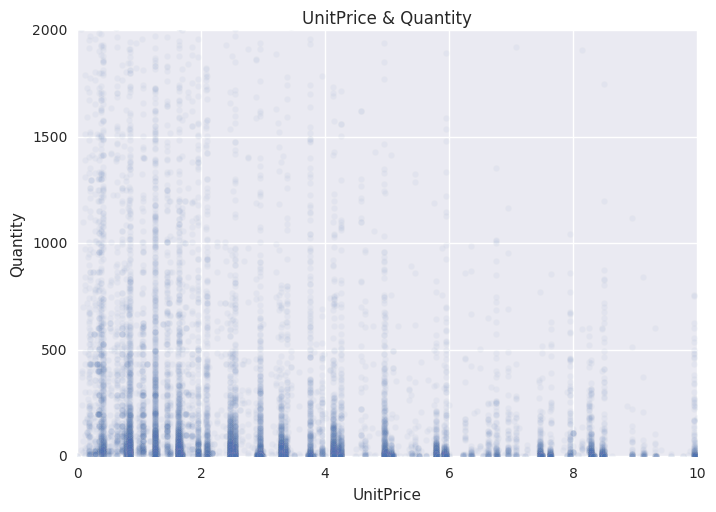

In [53]:
# UnitPrice と Quantity の関係
# UnitPrice が低い商品ほど多く購入されている気がする。
x = 'UnitPrice'
y = 'Quantity'
df_unitprice_quantity.plot(kind='scatter', x=x, y=y, alpha=0.05)
plt.xlim(0, 10)
plt.ylim(0, 2000)
plt.title('UnitPrice & Quantity')
plt.show()

In [59]:
# UnitPrice と Quantity の相関関係
import scipy

df_unitprice_quantity_limited = \
df_unitprice_quantity[(df_unitprice_quantity['UnitPrice'] <= 10) & (df_unitprice_quantity['Quantity'] <= 2000)]

display(df_unitprice_quantity_limited.corr())

scipy.stats.pearsonr(df_unitprice_quantity_limited['UnitPrice'].values, df_unitprice_quantity_limited['Quantity'].values)

,UnitPrice,Quantity
UnitPrice,1.000000,-0.237058
Quantity,-0.237058,1.000000


(-0.23705829485139804, 4.4185483585415839e-162)

In [60]:
df_unitprice_quantity_limited.describe()

,UnitPrice,Quantity
count,12728.000000,12728.000000
mean,3.143229,206.471009
std,2.359856,361.696723
min,0.001000,1.000000
25%,1.250000,10.000000
50%,2.510000,47.000000
75%,4.210000,208.000000
max,10.000000,2000.000000


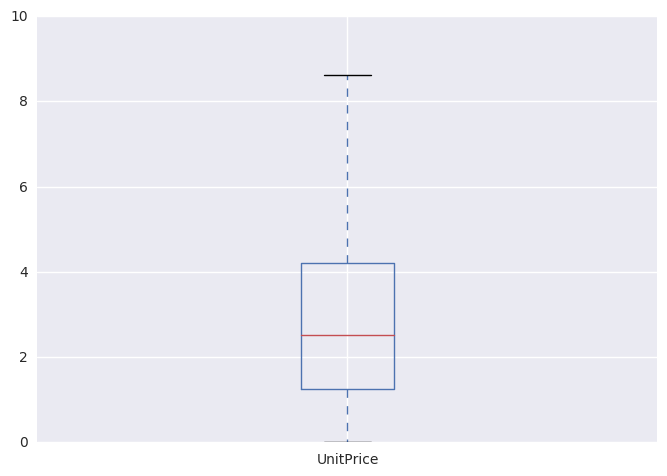

In [61]:
df_unitprice_quantity_limited['UnitPrice'].plot(kind='box')

In [35]:
# Quantity がかなり大きいレコードを実際に確認
df_unitprice_quantity[df_unitprice_quantity['Quantity'] > 60000]

,StockCode,UnitPrice,Quantity
8811,23166,1.04,76087
10212,23843,2.08,80995


In [40]:
df_unitprice_quantity[df_unitprice_quantity['StockCode'] == '23166']

,StockCode,UnitPrice,Quantity
8811,23166,1.04,76087
8812,23166,1.25,1832
8813,23166,2.46,114


In [51]:
# よく売れた商品は？
pd.DataFrame(df_sales.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)).reset_index().head()

,StockCode,Quantity
0,23843,80995
1,23166,78033
2,22197,56921
3,84077,55047
4,85099B,48474


In [50]:
best_sales = ['23843', '23166', '22197', '84077', '85099B']
df_sales[df_sales['StockCode'] == '85099B']['Description'].unique()

array(['JUMBO BAG RED RETROSPOT'], dtype=object)